Assignment 3: Create a model to perform binary classification between horse and human images using convolutional neural networks. Dataset available in Tensorflow datasets Please copy and paste the Dataset Link


dataset link: https://www.kaggle.com/datasets/sanikamal/horses-or-humans-dataset

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout,Flatten
from tensorflow.keras import backend as k

In [2]:
img_width,img_height = 224,224

In [3]:
train_data_dir = 'horse-or-human/train'
test_data_dir = 'horse-or-human/validation'
n_train = 1027
n_val = 256
epochs = 15
batch_size = 32

In [4]:
if k.image_data_format() == 'channel_first':
    input_shape = (3,img_width,img_height)
else:
    input_shape = (img_width,img_height,3)


In [5]:
model = Sequential()
model.add(Conv2D(32, (2,2), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [6]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [7]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width,img_height),
        batch_size = batch_size,
        class_mode='binary'
    )

Found 1027 images belonging to 2 classes.


In [8]:
val_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width,img_height),
        batch_size = batch_size,
        class_mode ='binary'
    )

Found 256 images belonging to 2 classes.


In [9]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=n_train // batch_size,
    epochs = epochs,
    validation_data = val_generator,
    validation_steps = n_val // batch_size
    )

C:\Users\Admin\AppData\Local\Temp\ipykernel_11732\3880542897.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
32/32 [==============================] - 41s 1s/step - loss: 49.3689 - accuracy: 0.6191 - val_loss: 0.9953 - val_accuracy: 0.7695
Epoch 2/15
32/32 [==============================] - 35s 1s/step - loss: 0.3666 - accuracy: 0.8191 - val_loss: 1.3311 - val_accuracy: 0.7812
Epoch 3/15
32/32 [==============================] - 41s 1s/step - loss: 0.2166 - accuracy: 0.9226 - val_loss: 1.4793 - val_accuracy: 0.8047
Epoch 4/15
32/32 [==============================] - 42s 1s/step - loss: 0.1793 - accuracy: 0.9387 - val_loss: 1.7382 - val_accuracy: 0.7734
Epoch 5/15
32/32 [==============================] - 41s 1s/step - loss: 0.1978 - accuracy: 0.9457 - val_loss: 1.9598 - val_accuracy: 0.8008
Epoch 6/15
32/32 [==============================] - 41s 1s/step - loss: 0.1218 - accuracy: 0.9719 - val_loss: 1.7776 - val_accuracy: 0.8477
Epoch 7/15
32/32 [==============================] - 44s 1s/step - loss: 0.0933 - accuracy: 0.9739 - val_loss: 2.2602 - val_accuracy: 0.8438
Epoch 8/15
32/32 [=

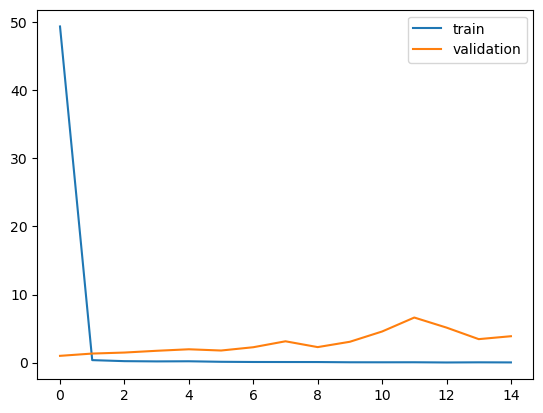

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

In [11]:
from tensorflow.keras.preprocessing.image import load_img

In [12]:
img = load_img('humann.jfif',target_size=(224,224))

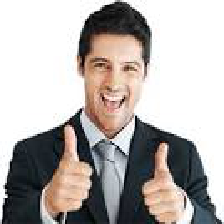

In [13]:
img

In [14]:
import numpy as np

In [15]:
img_array = np.array(img)

In [16]:
img_array = img_array.reshape(1,224,224,3)

In [17]:
labels = model.predict(img_array)

1/1 [==============================] - 1s 1s/step


In [18]:
labels

array([[0.00487637]], dtype=float32)

In [19]:
if labels[0][0]>=0.5:
    print('horse')
else:
    print('human')

human


In [20]:
img = load_img('horsse image.jpg',target_size=(224,224))

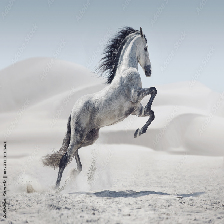

In [21]:
img

In [22]:
img_array = np.array(img)
img_array = img_array.reshape(1,224,224,3)
labels = model.predict(img_array)

1/1 [==============================] - 0s 42ms/step


In [23]:
labels

array([[0.99128634]], dtype=float32)

In [24]:
if labels[0][0]>=0.5:
    print('horse')
else:
    print('human')

horse
